# the random walk algorithm examined

### Resources: 
+ https://www.mit.edu/~kardar/teaching/projects/chemotaxis(AndreaSchmidt)/random.htm
+ https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/

In [2]:
from multidimvis_main import *

In [3]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import itertools as it 
from sklearn.cluster import SpectralClustering


import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import normalize

In [4]:
# the original function by Felix: 

'''
Random Walk Operator with restart probability.
Return Matrix.
''' 
def rnd_walk_matrix2(A, r, a, num_nodes):

    num = 1*num_nodes
    n = num_nodes
    factor = float((1-a)/n) # = 0 if alpha = 1.0 

    E = np.multiply(factor,np.ones([n,n]))              # prepare 2nd scaling term
    A_tele = np.multiply(a,A) + E  #     print(A_tele)
    M = normalize(A_tele, norm='l1', axis=0)                                 # column wise normalized MArkov matrix

    # mixture of Markov chains
    del A_tele
    del E

    U = np.identity(n,dtype=int) 
    H = (1-r)*M
    H1 = np.subtract(U,H)
    del U
    del M
    del H    

    W = r*np.linalg.inv(H1)   

    return W

In [5]:
# TREE GRAPH as toy network 

organism = 'tree'
n = 21 # number of nodes
branch = 2 # branching factor
G = nx.full_rary_tree(branch, n)
#nx.draw(G)

### RWR - random path generation

In [6]:
def random_walk_simple(start_v, number_of_steps):

    for step in range(1, number_of_steps):

        start_vertex = start_v # index of vertex to start from
        visited_vertices = {} # Dictionary that associate nodes with the amount of times it was visited   

        path = [start_vertex] # Store and print path  

        counter = 0 # Restart the cycle
        for counter in range(1, number_of_steps): 
            vertex_neighbors = [n for n in G.neighbors(start_vertex)] # get adjacent nodes
            probability = [] # Set probability of going to a neighbour is uniform
            probability = probability + [1./len(vertex_neighbors)] * len(vertex_neighbors)

            start_vertex = np.random.choice(vertex_neighbors, p=probability) # Choose a vertex from the vertex neighborhood to start the next random walk

            if start_vertex in visited_vertices: # Accumulate the amount of times each vertex is visited
                visited_vertices[start_vertex] += 1
            else:
                visited_vertices[start_vertex] = 1

            path.append(start_vertex) # Append to path

        # mostvisited = sorted(visited_vertices, key = visited_vertices.get,reverse = True) # Organize the vertex list in most visited decrescent order
        # print("Path: ", path)
        # print("Most visited nodes: ", mostvisited[:10]) # Separate the top 10 most visited vertex
        
        return path

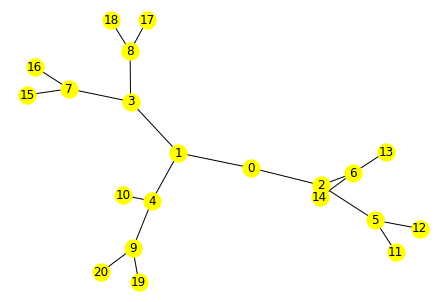

In [7]:
nx.draw(G, with_labels = True, node_color='yellow')

In [8]:
rw_list = []

for i in range(0,len(G.nodes)):
    randomwalk =  random_walk_simple(i, len(G.nodes()))
    rw_list.append(randomwalk)

In [9]:
rw_list

[[0, 2, 6, 2, 0, 1, 3, 7, 16, 7, 16, 7, 16, 7, 15, 7, 16, 7, 16, 7, 16],
 [1, 0, 2, 6, 14, 6, 2, 0, 1, 0, 2, 6, 13, 6, 2, 5, 12, 5, 12, 5, 12],
 [2, 6, 13, 6, 14, 6, 14, 6, 13, 6, 13, 6, 14, 6, 13, 6, 13, 6, 13, 6, 13],
 [3, 7, 3, 8, 17, 8, 18, 8, 17, 8, 18, 8, 17, 8, 18, 8, 17, 8, 3, 7, 15],
 [4, 1, 4, 10, 4, 10, 4, 1, 3, 8, 17, 8, 18, 8, 18, 8, 18, 8, 17, 8, 18],
 [5, 2, 6, 13, 6, 14, 6, 2, 0, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 8, 17],
 [6, 13, 6, 2, 5, 2, 0, 1, 0, 2, 5, 12, 5, 12, 5, 11, 5, 12, 5, 11, 5],
 [7, 16, 7, 3, 1, 4, 10, 4, 1, 0, 2, 5, 12, 5, 11, 5, 11, 5, 2, 6, 2],
 [8, 3, 8, 17, 8, 18, 8, 18, 8, 17, 8, 3, 1, 3, 1, 0, 2, 6, 14, 6, 14],
 [9, 20, 9, 4, 1, 0, 1, 4, 1, 4, 9, 20, 9, 20, 9, 4, 9, 19, 9, 4, 9],
 [10, 4, 9, 19, 9, 19, 9, 4, 10, 4, 9, 19, 9, 4, 9, 4, 9, 20, 9, 4, 1],
 [11, 5, 11, 5, 11, 5, 11, 5, 2, 5, 12, 5, 12, 5, 12, 5, 11, 5, 12, 5, 11],
 [12, 5, 11, 5, 12, 5, 2, 0, 2, 5, 12, 5, 11, 5, 2, 5, 2, 6, 13, 6, 14],
 [13, 6, 14, 6, 13, 6, 14, 6, 13, 6, 13, 6, 13, 6, 2, 6, 

In [10]:
A = nx.adjacency_matrix(G)
A_ = A.toarray()

In [11]:
print(A_)

[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]]


In [12]:
degs = dict(nx.degree(G))
d = list(degs.values())

print(d)

[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [13]:
d_mod = []
for i in d:
    new_d = 1/i
    d_mod.append(new_d)
    
print(d_mod)

[0.5, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [14]:
# ROW normalized
normalized = []
for i in A_:
    j = i/(sum(i)) # divide values in adjacency matrix with degree (row-wise normalized)
    normalized.append(j)  
A_norm = np.asmatrix(normalized)


# COLUMN normalized 
A_colnorm = normalize(A_, norm='l1', axis=0)  # if axis = 1 --> normalize rows
# A_test = normalize(A_, norm='l1', axis=1)

In [15]:
A_norm[:2]

matrix([[0.        , 0.5       , 0.5       , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ],
        [0.33333333, 0.        , 0.        , 0.33333333, 0.33333333,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        ]])

In [16]:
A_colnorm[:2]

array([[0.        , 0.33333333, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 0.        , 0.33333333, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [17]:
# RWR FORMULA > p(t+1) = (1-r)*A_colnorm*p(t) + r*p0

# W = column normalized A matrix 
# p(t) = vector of respective p at time t
# p0 = vector of 1/degree if adjacent, 0 if not adjacent 

# --------------------------------------------------------

# FORMULA PART 1
# Adjacency matrix normalized multiplied with 1-r

r = 0.8 
transition = (1-r)*A_norm # A_colnorm

#plt.figure(figsize=(12,12))
#sns.heatmap(transition, annot=True)

In [18]:
# construct EINHEITSMATRIX and subtract first part of formula 

einheitsmatrix = np.identity(len(G.nodes()),dtype=int) 
# inverse matrix = the matrix to multiply the initial starting matrix with it, to get an "Einheitsmatrix" (i.e. all values = 0, except diagonals = 1)

transition2 = np.subtract(einheitsmatrix, transition) # mix of "Einheitsmatrix" + negativ values of initial matrix

#plt.figure(figsize=(12,12))
#sns.heatmap(transition2, annot=True)

In [19]:
# multiply with restart probability

visiting = r*np.linalg.inv(transition2)

#plt.figure(figsize=(12,12))
#sns.heatmap(visiting, annot=True)

------

## RWR + FUNCTION-BASED LAYOUT - TRY OUT 

### Get human PPI + function-feature matrix

In [20]:
organism = 'Human'

G = nx.read_edgelist('input/ppi_elist.txt',data=False)
# d_ent_sym, d_sym_ent = genent2sym()

d_gene_do = pickle.load( open( "input/d_gene_do.pkl", "rb" ) )
d_do_genes = pickle.load( open( "input/d_do_genes.pkl", "rb" ) )
d_do_names = pickle.load( open( "input/DO_names.pkl", "rb" ) )
d_names_do = {y:x for x,y in d_do_names.items()}

df_gene_sym = pd.read_csv('output_csv/DF_gene_symbol_Human.csv', index_col=0)
l_features = list((df_gene_sym.to_dict()).values())

posG_entrez = []
for k in G.nodes():
    posG_entrez.append(k)
    
    
features_MF = pd.read_csv('output_csv/Features_GO_MolFunc_Dataframe_Human.csv', index_col=0)
features_MF

,GO:0000010,GO:0000014,GO:0000016,GO:0000026,GO:0000030,GO:0000033,GO:0000035,GO:0000036,GO:0000048,GO:0000049,...,GO:1990837,GO:1990841,GO:1990883,GO:1990930,GO:1990931,GO:1990948,GO:1990955,GO:1990984,GO:2001065,GO:2001069
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107987462,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107987491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109703458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110117499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
feat_genes = list(features_MF.index)

### Idea: Feature Matrix = basis for Adjacency matrix for RWR calculation
#### Get Feature top list i.e. features with most genes associated 

In [22]:
# SUM UP ROWS to see max feature association value
feat_array = features_MF.to_numpy()

feat_row_added = []
for i in feat_array:
    feat_row_added.append(sum(i))
#print(len(feat_row_added))
    
    
# GET FEATURES TOP LIST
feat_col_added = [sum(x) for x in zip(*feat_array)]
#print(len(feat_col_added))

feat_col_names = list(features_MF.columns)
d_feat_col = dict(zip(feat_col_names,feat_col_added))
d_feat_col_sorted = {k: v for k, v in sorted(d_feat_col.items(), key=lambda item: item[1], reverse=True)}

lower_bound = 100
upper_bound = 200

d_feat_toplist = {}
for k,v in d_feat_col_sorted.items():
    if v >= lower_bound and v <= upper_bound: 
        d_feat_toplist[k] = v
        
#print(ad_feat_toplist)
print('Number of top features based on selection:',len(d_feat_toplist))

Number of top features based on selection: 26


In [23]:
# check for genes associated with feature 

feat_top_genes = []
for feature,genes in features_MF.iteritems():
    for top in d_feat_toplist.keys():
        if top == feature:
            for k,v in genes.items():
                if v == 1:
                    feat_top_genes.append(k)             

In [24]:
empty_matrix = np.zeros(shape=(len(feat_genes),len(feat_genes)))
empty_df = pd.DataFrame(empty_matrix, index = feat_genes, columns = feat_genes)
empty_df.head()

,2,9,10,12,13,14,15,16,18,19,...,102724159,102724334,102724428,102724862,105371242,107987462,107987491,109703458,110117499,110599564
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
feat_top_genes_sort = sorted(feat_top_genes)
len(feat_top_genes_sort)

In [27]:
# get pairs from top list of genes 

feat_comb = list(it.combinations(feat_top_genes_sort, 2))

# add a value = 1 if a gene is associated with one of the "toplist-features" 
for edge in feat_comb:
    empty_df.at[edge[0],edge[1]] = 1.0
    
    
func_df = empty_df
func_array = empty_df.to_numpy()
len(func_df)

15165

In [28]:
# feature genes row names
feat_row_names = [str(i) for i in feat_genes]
func_df.index=feat_row_names
func_df.columns=feat_row_names

# original graph row names
graph_row_names = list(G.nodes())
len(graph_row_names)

16376

In [30]:
empty_matrix2 = np.zeros(shape=(len(graph_row_names),len(graph_row_names)))
empty_df2 = pd.DataFrame(empty_matrix2, index = graph_row_names, columns = graph_row_names)
empty_df2

,66008,8473,2561,3759,22906,4928,1994,8481,81610,51361,...,10838,8001,51351,1551,51458,143903,10861,51471,221044,29965
66008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
df1 = empty_df2 
df2 = func_df

In [32]:
idx = df2.index.intersection(df1.index)
idx

Index(['2', '9', '10', '12', '14', '15', '16', '18', '19', '20',
       ...
       '100142659', '100170841', '100287171', '100287932', '100288797',
       '100289635', '100293516', '100381270', '100423062', '100462977'],
      dtype='object', length=13864)

In [33]:
cols = df2.columns.intersection(df1.columns)
cols

Index(['2', '9', '10', '12', '14', '15', '16', '18', '19', '20',
       ...
       '100142659', '100170841', '100287171', '100287932', '100288797',
       '100289635', '100293516', '100381270', '100423062', '100462977'],
      dtype='object', length=13864)

In [34]:
df = df2.loc[idx, cols].combine_first(df1).astype(int)
df

,1,10,100,1000,10000,10001,10002,10003,100037417,100049587,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# FUNCTIONAL 
A_features = df.to_numpy()

# STRUCTURAL 
A_graph = nx.adjacency_matrix(G)
A = A_graph.toarray()

In [36]:
def rwr_matrix(A, r): 
    n = len(A) # take the whole network into account = all nodes are seed nodes
    factor = 1 
    a = 1 # maximum freedom to jump anytime to any node within the network
    
    E = np.multiply(factor,np.ones([n,n])) # Matrix with all 1 --> to 
    A_tele = np.multiply(a,A) + E  #     print(A_tele)
    M = normalize(A_tele, norm='l1', axis=0)                                 # column wise normalized MArkov matrix

    # mixture of Markov chains
    del A_tele
    del E

    U = np.identity(n,dtype=int) 
    H = (1-r)*M
    H1 = np.subtract(U,H)
    del U
    del M
    del H    

    W = r*np.linalg.inv(H1)   

    return W

#### Functionally-based RWR

In [37]:
r = 0.8 # restart probability to 
func_rwr_matrix = rwr_matrix(A_features,r)

In [38]:
func_rwr_matrix

array([[8.00012179e-01, 1.21790345e-05, 1.21790345e-05, ...,
        1.21790345e-05, 1.21790345e-05, 1.21790345e-05],
       [1.21790345e-05, 8.00012179e-01, 1.21790345e-05, ...,
        1.21790345e-05, 1.21790345e-05, 1.21790345e-05],
       [1.21790345e-05, 1.21790345e-05, 8.00012179e-01, ...,
        1.21790345e-05, 1.21790345e-05, 1.21790345e-05],
       ...,
       [1.21790345e-05, 1.21790345e-05, 1.21790345e-05, ...,
        8.00012179e-01, 1.21790345e-05, 1.21790345e-05],
       [1.21790345e-05, 1.21790345e-05, 1.21790345e-05, ...,
        1.21790345e-05, 8.00012179e-01, 1.21790345e-05],
       [1.21790345e-05, 1.21790345e-05, 1.21790345e-05, ...,
        1.21790345e-05, 1.21790345e-05, 8.00012179e-01]])

In [39]:
df_func = pd.DataFrame(func_rwr_matrix, columns = list(G.nodes()), index=list(G.nodes()))
df_func

,66008,8473,2561,3759,22906,4928,1994,8481,81610,51361,...,10838,8001,51351,1551,51458,143903,10861,51471,221044,29965
66008,0.800012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
8473,0.000012,0.800012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
2561,0.000012,0.000012,0.800012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
3759,0.000012,0.000012,0.000012,0.800012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
22906,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143903,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012,0.000012,0.000012,0.000012
10861,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012,0.000012,0.000012
51471,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012,0.000012
221044,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012


#### Structural / Classic RWR

In [40]:
struct_rwr_matrix = rwr_matrix(A,r)

In [41]:
struct_rwr_matrix

array([[8.00012196e-01, 2.18270727e-05, 2.19747761e-05, ...,
        1.22121354e-05, 1.22121345e-05, 1.22115375e-05],
       [2.19547475e-05, 8.00012164e-01, 1.22228648e-05, ...,
        1.22263303e-05, 1.22263294e-05, 1.22257317e-05],
       [2.19359467e-05, 1.21303122e-05, 8.00012205e-01, ...,
        1.22078518e-05, 1.22078509e-05, 1.22072542e-05],
       ...,
       [1.21860919e-05, 1.21293077e-05, 1.22033809e-05, ...,
        8.00012207e-01, 1.22069589e-05, 1.22063621e-05],
       [1.21860911e-05, 1.21293068e-05, 1.22033800e-05, ...,
        1.22069589e-05, 8.00012207e-01, 1.22063613e-05],
       [1.21862394e-05, 1.21294545e-05, 1.22035286e-05, ...,
        1.22071075e-05, 1.22071066e-05, 8.00012207e-01]])

In [79]:
df_struct = pd.DataFrame(struct_rwr_matrix, columns = list(G.nodes()), index=list(G.nodes()))
df_struct

,66008,8473,2561,3759,22906,4928,1994,8481,81610,51361,...,10838,8001,51351,1551,51458,143903,10861,51471,221044,29965
66008,0.800012,0.000022,0.000022,0.000022,0.000022,0.000022,0.000020,0.000022,0.000022,0.000022,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
8473,0.000022,0.800012,0.000012,0.000012,0.000022,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
2561,0.000022,0.000012,0.800012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
3759,0.000022,0.000012,0.000012,0.800012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
22906,0.000022,0.000022,0.000012,0.000012,0.800012,0.000022,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143903,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012,0.000012,0.000012,0.000012
10861,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012,0.000012,0.000012
51471,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012,0.000012
221044,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000011,0.000012,0.000012,0.000012,...,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.000012,0.800012,0.000012


In [108]:
# INPUT FOR EMBEDDING ≠ Distance Matrix, but instead FEATURE MATRIX

#DM = df_struct
#feature='structural'


DM = df_func
feature='functional'


# set gene list (= G.nodes())
genes = []
for i in DM.index:
    genes.append(str(i))
    
genes_rest = [] 
for g in G.nodes():
    if g not in genes:
        genes_rest.append(g)

---
 # VISUALIZATION

In [82]:
# Node, Edge colors

edge_width = 0.1
edge_color = 'lightgrey'

edge_col = 'lightgrey'
edge_colordark = 'dimgrey'
opacity_edges = 0.5

opacity_nodes = 1.0
node_edge_col = None


# Node sizes 

scalef= 0.5
size = list(draw_node_degree(G, scalef).values())

scalef= 0.1
size3d = list(draw_node_degree_3D(G, scalef).values())

# UMAP 2D

In [88]:
n_neighbors = 20 # balance between local and global structure in the data
spread = 1.0
min_dist = 0.1 # defines how dense points are stacked together 
metric ='cosine'

In [91]:
import umap 

def embed_umap_2D(Matrix, n_neighbors, spread, min_dist, metric='cosine'):
    n_components = 2 # for 2D

    U = umap.UMAP(
        n_neighbors = n_neighbors,
        spread = spread,
        min_dist = min_dist,
        n_components = n_components,
        metric = metric)
    embed = U.fit_transform(Matrix)
    
    return embed

In [92]:
%%time 
umap = embed_umap_2D(DM, n_neighbors, spread, min_dist, metric)

CPU times: user 6min 14s, sys: 9.78 s, total: 6min 24s
Wall time: 4min 29s


In [76]:
%%time 
posG_umap = get_posG_2D(genes, umap)

CPU times: user 13.1 ms, sys: 1.25 ms, total: 14.3 ms
Wall time: 13.6 ms


In [96]:
%%time 
df_posG = pd.DataFrame(posG_umap).T

n_clus = len(d_feat_toplist) #50
color_method = 'spectral'

model = SpectralClustering(n_clusters=n_clus,n_components = 2, affinity='nearest_neighbors')
clusterid = model.fit_predict(df_posG)

d_node_clusterid = dict(zip(genes, clusterid))

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.

/Users/chris/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:314: ConvergenceWarning:

Number of distinct clusters (23) found smaller than n_clusters (26). Possibly due to duplicate points in X.



CPU times: user 51.7 s, sys: 308 ms, total: 52 s
Wall time: 13.3 s


In [100]:
df_centralities = pd.read_csv('output_csv/Features_centralities_Dataframe_'+organism+'.csv', index_col=0)

d_deghubs = dict(zip(G.nodes(),df_centralities['degs']))
d_clos = dict(zip(G.nodes(), df_centralities['clos']))
d_betw = dict(zip(G.nodes(), df_centralities['betw']))
d_eigen = dict(zip(G.nodes(), df_centralities['eigen']))

d_centralities = dict(zip(list(G.nodes),zip(d_deghubs.values(),d_clos.values(),d_betw.values(),d_eigen.values())))

l_features = []
for i in d_centralities.items():
    k=list(i)
    l_features.append(k)

DM_centralities = pd.DataFrame(distance.squareform(distance.pdist(df_centralities, 'cosine')))

DM_centralities.index = G.nodes()
DM_centralities.columns = G.nodes()

In [101]:
# colour parameter from cluster 
#colours = color_nodes_from_dict(G, d_node_clusterid, color_method)
#len(colours)

color_method = 'clos'
colours = color_nodes_from_dict(G, d_clos, color_method)

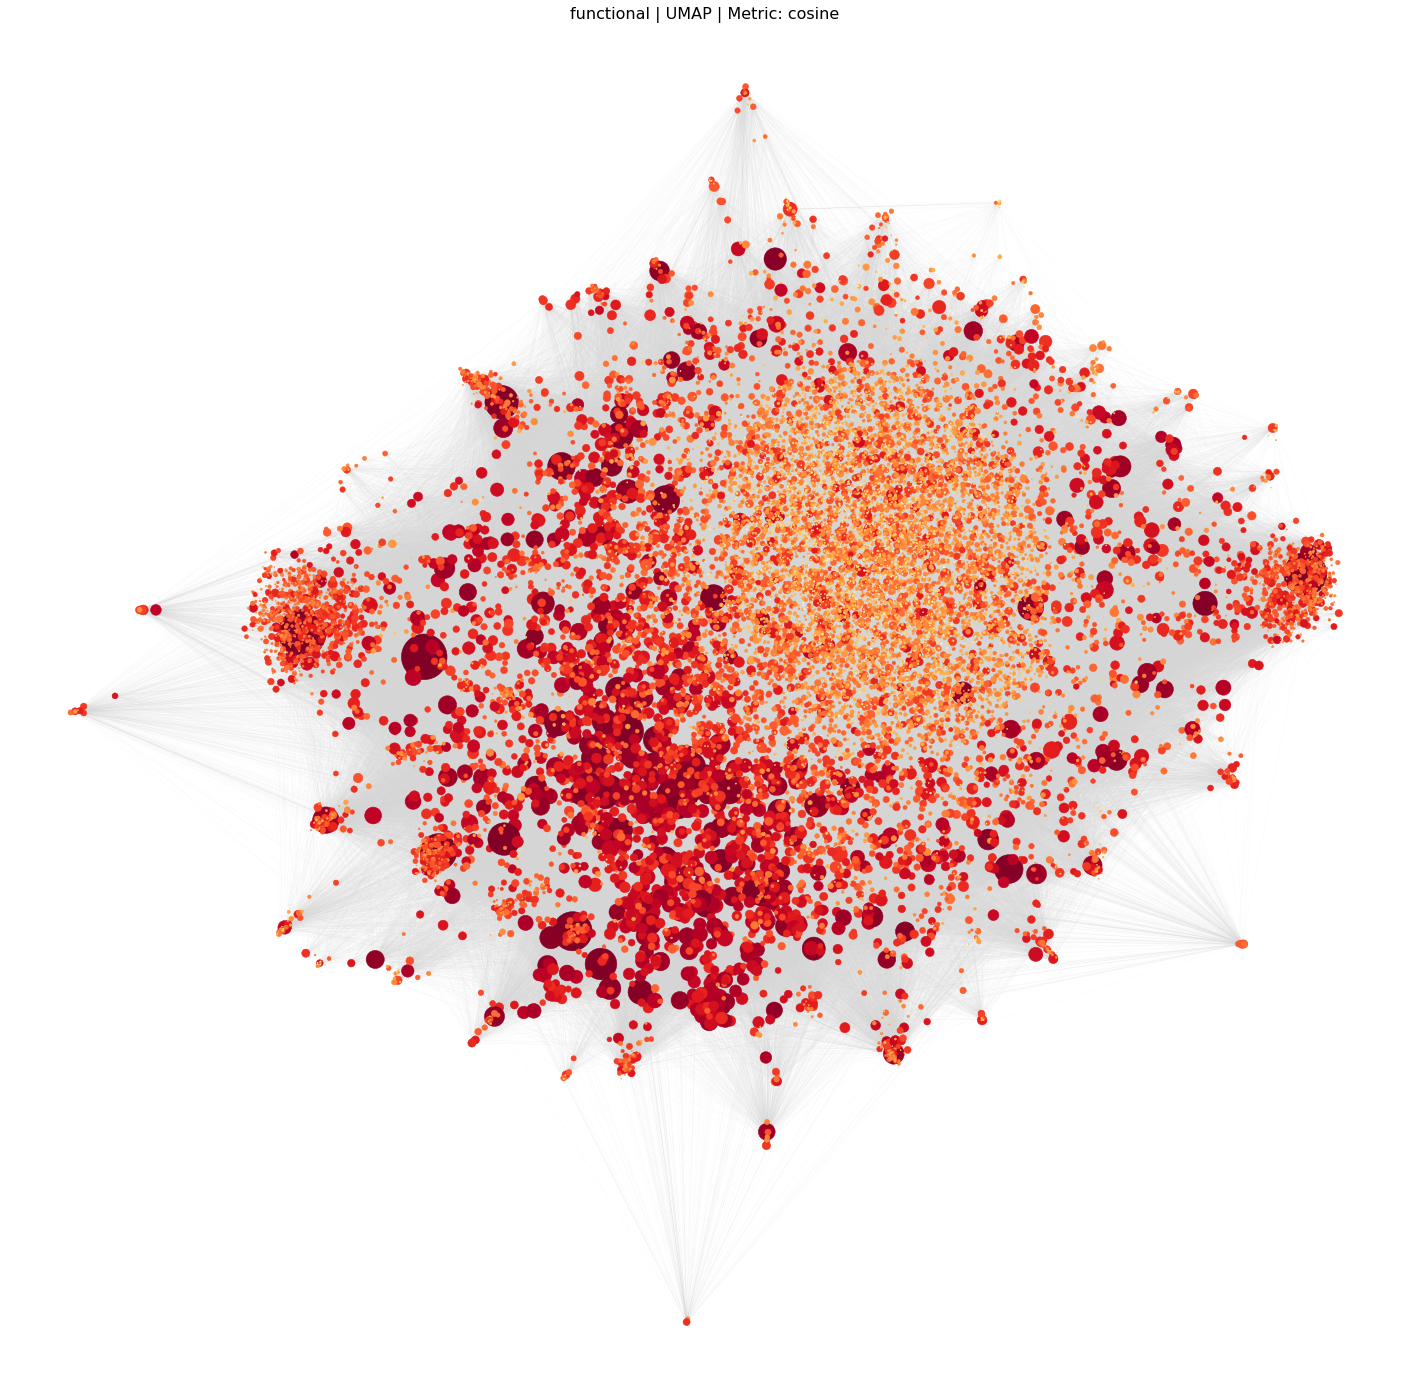

In [109]:
plt.figure(figsize=(25,25))
plt.title(feature+' | UMAP | Metric: '+metric, size=16)

nx.draw_networkx_nodes(G, posG_umap, edgecolors = node_edge_col, linewidths = 0.5, node_color=colours, 
                       node_size = size, 
                       alpha = opacity_nodes)
nx.draw_networkx_edges(G, posG_umap, width = edge_width, edge_color = edge_color, alpha = opacity_edges)
plt.box(False)

#plt.savefig('output_plots/2DPortraitumap_'+feature+'_'+metric+'_'+color_method+'_'+str(n_neighbors)+'_'+str(spread)+'_'+str(min_dist)+'_'+organism+'noedges.png')

plt.show()

# UMAP 3D 

In [104]:
%%time 
umap_3D = embed_umap_3D(DM, n_neighbors, spread, min_dist, metric)

CPU times: user 6min 9s, sys: 9.62 s, total: 6min 19s
Wall time: 4min 23s


In [105]:
# MAIN (if not all G.nodes)
posG_3Dumap = get_posG_3D(genes, umap_3D)

# REST (if genes = G.nodes then rest will be ignored / empty)

# get center of data points
xx=[]
yy=[]
zz=[]

for i in posG_3Dumap.values():
    xx.append(i[0])
    yy.append(i[1])
    zz.append(i[2]) 

cx = sum(xx)/len(genes)
cy = sum(yy)/len(genes)
cz = sum(zz)/len(genes)

# generate spherical coordinates for rest genes (without e.g. GO term or Disease Annotation)
indices = arange(0, len(genes_rest))
phi = arccos(1 - 2*indices/len(genes_rest))
theta = pi * (1 + 5**0.5) * indices

xm, ym, zm = max(posG_3Dumap.values())
r = math.sqrt((cx - xm)**2 + (cy - ym)**2 + (cz - zm)**2)
x, y, z = cx+r*cos(theta) * sin(phi),cy+r*sin(theta) * sin(phi), cz+r*cos(phi)

rest_points = []
for i,j,k in zip(x,y,z):
    rest_points.append((i,j,k))

posG_rest = dict(zip(genes_rest, rest_points))

posG_all = {**posG_3Dumap, **posG_rest}
posG_3D_complete_umap = {key:posG_all[key] for key in G.nodes()}

# normalize coordinates 
x_list = []
y_list = []
z_list = []
for k,v in posG_3D_complete_umap.items():
    x_list.append(v[0])
    y_list.append(v[1])
    z_list.append(v[2])
    
xx_norm = sklearn.preprocessing.minmax_scale(x_list, feature_range=(0, 1), axis=0, copy=True)
yy_norm = sklearn.preprocessing.minmax_scale(y_list, feature_range=(0, 1), axis=0, copy=True)
zz_norm = sklearn.preprocessing.minmax_scale(z_list, feature_range=(0, 1), axis=0, copy=True)

posG_3D_complete_umap_norm = dict(zip(list(G.nodes()), zip(xx_norm,yy_norm,zz_norm)))

In [106]:
%%time 
umap_nodes = get_trace_nodes_3D(posG_3D_complete_umap_norm, l_features, colours, size3d)
umap_edges = get_trace_edges_3D(G, posG_3D_complete_umap_norm, edge_colordark, opac=0.15)

umap_data = [umap_edges, umap_nodes]
#umap_data = [umap_nodes]

CPU times: user 4.48 s, sys: 78.5 ms, total: 4.56 s
Wall time: 4.67 s


In [110]:
print('# Neighbours:', n_neighbors)
print('Spread:',spread)
print('Min. Distance:', min_dist)


fig = pgo.Figure()
for i in umap_data:
    fig.add_trace(i)

fig.update_layout(template='plotly_dark', showlegend=False, width=1200, height=1200,
                  scene=dict(
                      xaxis_title='',
                      yaxis_title='',
                      zaxis_title='',
                      xaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      yaxis=dict(nticks=0,tickfont=dict(
                            color='black')),
                      zaxis=dict(nticks=0,tickfont=dict(
                            color='black')),    
                    dragmode="turntable",
                    #annotations=annotations,
                ))    


# py.iplot(fig)
plotly.offline.plot(fig, filename = 'output_plots/3Dportrait_umap_'+feature+'_'+metric+'_'+color_method+'_'+str(n_neighbors)+'_'+str(spread)+'_'+str(min_dist)+'_'+organism+'.html', auto_open=True)

# Neighbours: 20
Spread: 1.0
Min. Distance: 0.1


'output_plots/3Dportrait_umap_functional_cosine_clos_20_1.0_0.1_Human.html'